# Frequency distribution

Frequency distribution of a categorical variable cab be produced as frequency table or as bar chart.

Frequency table is a table which contains the number of occurrencies of variables (i.e., frequencies) and percentages of occurrencies.

In the following one possible way to formulate a frequancy table and bar chart is given.

In [1]:
### First, import necessary libraries.

import pandas as pd
import matplotlib.pyplot as plt

### Style has effect on the layout of graphics.
### Styles available can be listed using the command plt.style.available

plt.style.use('seaborn-whitegrid')

In [2]:
### Next we open the data

df = pd.read_excel('http://myy.haaga-helia.fi/~menetelmat/Data-analytiikka/Teaching/data1_en.xlsx')

### And check it looks proper.

df.head()

,number,sex,age,family,education,empl_years,salary,management,colleagues,environment,salary_level,duties,occu_health,timeshare,gym,massage
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [3]:
### We now change number values [1, 2, 3, 4] of education to a list of corresponding textual counterparts.


education =['Comprehensive school level', 'Upper secondary education', 'Academic degree', 'Higher academic degree']

### This finishes our preparations.

In [4]:
### Number of occurrencies using the crosstab funtion.

df1 = pd.crosstab(df['education'], 'Total')

df1

col_0,Total
education,
1.0,27
2.0,30
3.0,22
4.0,2


In [5]:
### Although basically correct, we want to make changes so that the table will become clear and readable.

### First remove the misleading heading.

df1.columns.name = ''

### Use textual values of education instead of numbers.

df1.index = education

### Add percentages

n = df1['Total'].sum()
df1['%'] = (df1['Total'] / n) * 100

### Add row for total values of columns

df1.loc['Total'] = df1.sum()

### Finalize the layout including the number of decimals.

df1.style.format({'Total' : '{:.0f}', '%' : '{:.1f}' })

,Total,%
Comprehensive school level,27,33.3
Upper secondary education,30,37.0
Academic degree,22,27.2
Higher academic degree,2,2.5
Total,81,100.0


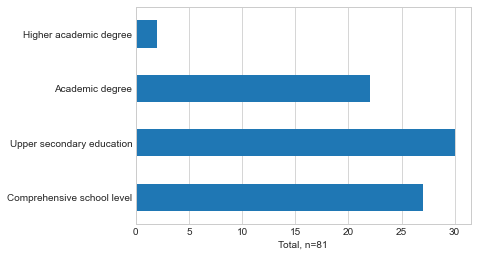

In [6]:
### Now let's move to the graphics.

### We create a bar chart from number values of the column for total. The total row is, however, ignored.

df1.drop('Total')['Total'].plot.barh()

### Add axis title for the horisontal axis. The value for n is calculated in the previous cell.

plt.xlabel('Total, n=' + str(n))

### The style seaborn-whitegrid contains both horisontal and vertical gridlines.
### Try it yourself!

### In this example we overturn the horisontal gridlines, and so only the vertical ones remain.

plt.grid(axis = 'y')

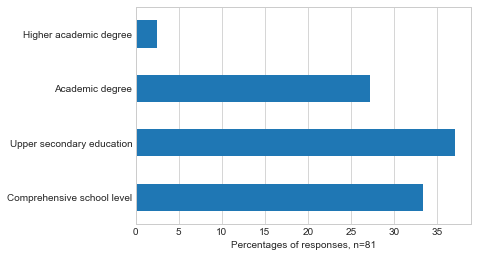

In [7]:
### Next we create a bar chart of percentages. Again, the Total row is ignored.

df1.drop('Total')['%'].plot.barh()

### Add axis title.

plt.xlabel('Percentages of responses, n=' + str(n))

### Only vertical gridlines are shown.

plt.grid(axis = 'y')

In [8]:
### We also can save figures created. Here bounding box is added, too.

### plt.savefig('percentage-chart.png', bbox_inches = 'tight')

### Further information

<a href="https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html">https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html</a>

Source and origin of inspiration:<br /> 
Aki Taanila: Data-analytiikka Pythonilla: <a href="https://tilastoapu.wordpress.com/python/">https://tilastoapu.wordpress.com/python/</a>